### 1. Importing the Libraries

In [133]:
import pandas as pd

### 2. Importing the Dataset

In [134]:
data = pd.read_csv('heart.csv')

### 3. Taking Care of Missing Values

In [135]:
data.isnull().sum()
#no missing values to be found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [136]:
# checking dublicate data
data_dup = data.duplicated().any()

In [137]:
data_dup

True

In [138]:
# removing dublicates data
data = data.drop_duplicates()

In [139]:
data_dup = data.duplicated().any()

In [140]:
data_dup

False

### 5. Data Processing

In [141]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [142]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [143]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [144]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [145]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [146]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [147]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 7. Feature Scaling

In [148]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [151]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [152]:
X = data.drop('target',axis=1)

In [153]:
y = data['target']

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [156]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [157]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [160]:
y_pred1 = log.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

### 10. SVC

In [163]:
from sklearn import svm

In [164]:
svm = svm.SVC()

In [165]:
svm.fit(X_train,y_train)

SVC()

In [166]:
y_pred2 = svm.predict(X_test)

In [167]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

### 11. KNeighbors Classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn = KNeighborsClassifier()

In [170]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [171]:
y_pred3=knn.predict(X_test)

In [172]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [173]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [174]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [175]:
import matplotlib.pyplot as plt

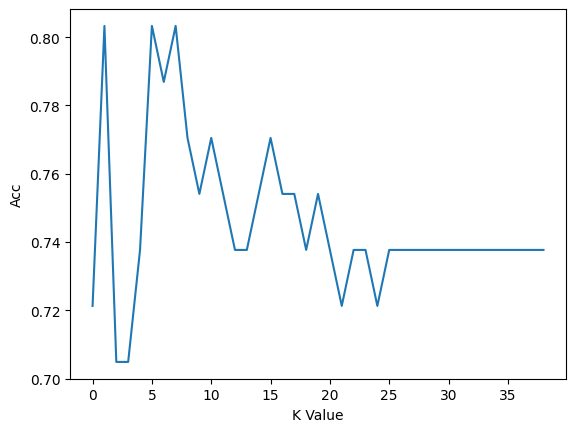

In [176]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [177]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

### Non-Linear ML Algorithms

In [178]:
data = pd.read_csv('heart.csv')

In [179]:
data = data.drop_duplicates()

In [180]:
X = data.drop('target',axis=1)
y=data['target']

In [181]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dt = DecisionTreeClassifier()

In [184]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [185]:
y_pred4= dt.predict(X_test)

In [186]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

### 13. Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rf = RandomForestClassifier()

In [189]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [190]:
y_pred5= rf.predict(X_test)

In [191]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

### 14. Gradient Boosting Classifier

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

In [193]:
gbc = GradientBoostingClassifier()

In [194]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [195]:
y_pred6 = gbc.predict(X_test)

In [196]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [197]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [198]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,72.131148
4,RF,85.245902
5,GB,80.327869


In [199]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'ACC')

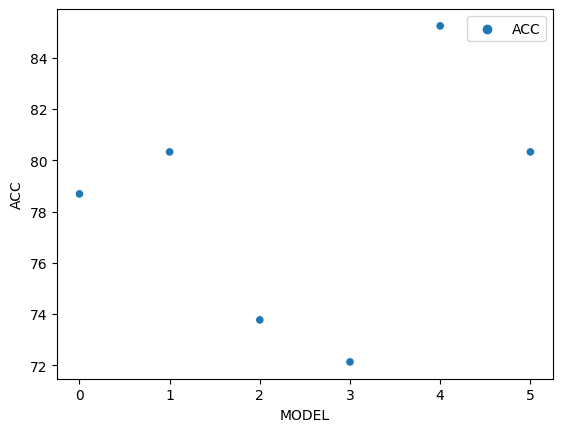

In [200]:
#sns.barplot(final_data['Models'],final_data['ACC'])

sns.scatterplot( data=final_data)
plt.xlabel("MODEL")
plt.ylabel("ACC")

In [201]:
X=data.drop('target',axis=1)
y=data['target']

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

In [204]:
import pandas as pd

In [205]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [206]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [207]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


### 16. Save Model Using Joblib

In [208]:
import joblib

In [209]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [210]:
model = joblib.load('model_joblib_heart')

In [211]:
model.predict(new_data)

array([0], dtype=int64)

In [212]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### GUI

In [213]:
from tkinter import *
import joblib

In [214]:
#creating virtual display
%apt-get update
%apt-get install -y xvfb x11-utils
%pip install pyvirtualdisplay
%pip install piglet

from pyvirtualdisplay import Display

display = Display(visible=0, size=(800, 600))
display.start()

import os
os.environ['DISPLAY'] =  str(display.display)


UsageError: Line magic function `%apt-get` not found.


In [215]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *

master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text="Heart Disease Prediction System", bg="black", fg="white")
label.grid(row=0, columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

def show_entry_fields():
    global master
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)

Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()


c:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
